
<center>


# Task-04

## Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.



### Dataset :-  https://www.kaggle.com/gti-upm/leapgestrecog

</center>



In [19]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np
import keras.backend as K
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
# from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
from sklearn.datasets import make_multilabel_classification
# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical



In [7]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "Data/leapgestrecog/leapGestRecog"

## The Data

In [8]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 6, 8, ..., 4, 5, 6],
        [5, 6, 7, ..., 4, 4, 3],
        [6, 6, 7, ..., 5, 4, 4],
        ...,
        [6, 6, 6, ..., 5, 5, 6],
        [6, 5, 7, ..., 4, 5, 5],
        [6, 5, 6, ..., 5, 5, 5]], dtype=uint8),
 0]

In [9]:
# shuffle the input data
import random
random.shuffle(image_data)

In [10]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)
input_data[:5]

[array([[5, 6, 5, ..., 3, 5, 5],
        [5, 5, 5, ..., 4, 4, 3],
        [4, 6, 5, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 5, 5, 4],
        [4, 5, 5, ..., 4, 5, 3],
        [4, 4, 5, ..., 3, 4, 3]], dtype=uint8),
 array([[5, 6, 5, ..., 4, 4, 5],
        [5, 7, 7, ..., 4, 4, 4],
        [6, 6, 6, ..., 4, 4, 4],
        ...,
        [6, 5, 6, ..., 5, 5, 6],
        [6, 6, 6, ..., 5, 5, 4],
        [5, 6, 5, ..., 3, 6, 3]], dtype=uint8),
 array([[4, 6, 5, ..., 5, 4, 5],
        [5, 5, 6, ..., 3, 4, 4],
        [5, 6, 6, ..., 5, 5, 5],
        ...,
        [4, 5, 5, ..., 4, 5, 5],
        [3, 4, 5, ..., 4, 5, 3],
        [5, 4, 5, ..., 5, 4, 5]], dtype=uint8),
 array([[5, 6, 5, ..., 4, 3, 4],
        [5, 5, 5, ..., 4, 3, 4],
        [4, 5, 5, ..., 4, 4, 3],
        ...,
        [4, 5, 4, ..., 4, 3, 3],
        [5, 5, 4, ..., 4, 4, 3],
        [5, 5, 4, ..., 4, 5, 3]], dtype=uint8),
 array([[ 5,  4,  5, ...,  3,  3,  4],
        [ 3,  4,  5, ...,  3,  4,  3],
        [ 5,  5,  

In [11]:
label[:10]

[8, 0, 6, 3, 1, 1, 7, 1, 1, 6]

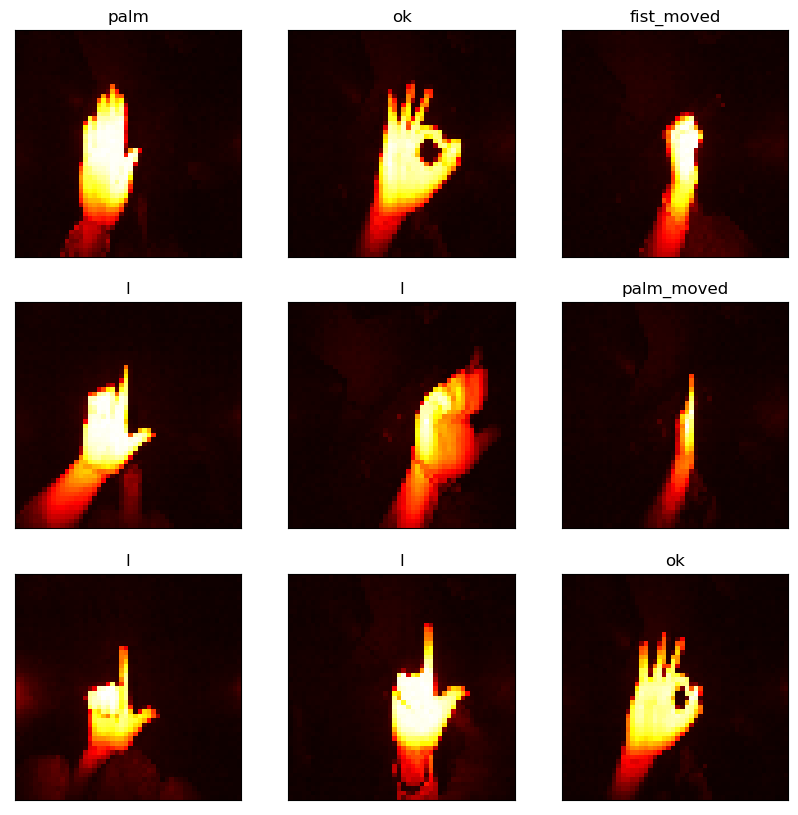

In [12]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
#plt.show()

In [13]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

# **Making multibalbel classifier**

In [14]:
from sklearn.datasets import make_multilabel_classification
X,y=make_multilabel_classification(n_samples=500,n_features=4,n_classes=2,n_labels=3,random_state=1)
X

array([[ 9., 12.,  6., 12.],
       [ 5.,  2., 12., 22.],
       [15.,  5., 12., 11.],
       ...,
       [ 5., 10., 15., 28.],
       [ 0.,  8., 16., 27.],
       [ 6.,  9., 13., 22.]])

In [15]:
y

array([[0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1,

<function matplotlib.pyplot.show(close=None, block=None)>

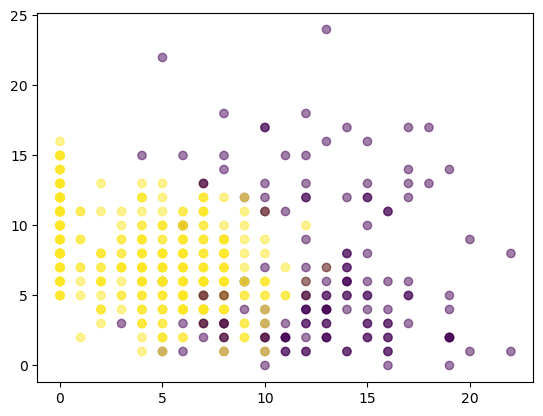

In [16]:
rng=np.random.RandomState(1)
colors=rng.rand(1000)
plt.scatter(X[:,0:1],X[:,1:2],c=y[:,0],alpha=0.5,cmap='viridis')
plt.show

# **Normalise**

In [17]:
X=(X-X.min())/(X.max()-X.min())
X

array([[0.20454545, 0.27272727, 0.13636364, 0.27272727],
       [0.11363636, 0.04545455, 0.27272727, 0.5       ],
       [0.34090909, 0.11363636, 0.27272727, 0.25      ],
       ...,
       [0.11363636, 0.22727273, 0.34090909, 0.63636364],
       [0.        , 0.18181818, 0.36363636, 0.61363636],
       [0.13636364, 0.20454545, 0.29545455, 0.5       ]])

In [20]:
label = to_categorical(label, num_classes=10).astype('i1')
print(label[0])

[0 0 0 0 0 0 0 0 1 0]


In [21]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

# **Splitting the input_data to train and test data**

In [22]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.10, random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((18000, 50, 50, 1), (18000, 10), (2000, 50, 50, 1), (2000, 10))

## The Model

In [23]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))

model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
         optimizer = 'rmsprop',
         metrics = ['accuracy'])
    

2024-07-08 21:08:13.882400: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-07-08 21:08:13.882566: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: arya16
2024-07-08 21:08:13.882579: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: arya16
2024-07-08 21:08:13.882867: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 535.183.1
2024-07-08 21:08:13.882904: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: 470.239.6
2024-07-08 21:08:13.882914: E external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:251] kernel version 470.239.6 does not match DSO version 535.183.1 -- cannot find working devices in this configuration


In [24]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7


2024-07-08 21:08:20.388774: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 180000000 exceeds 10% of free system memory.


  1/563 ━━━━━━━━━━━━━━━━━━━━ 16:45 2s/step - accuracy: 0.2188 - loss: 2.2907

2024-07-08 21:08:22.260130: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23369472 exceeds 10% of free system memory.
2024-07-08 21:08:22.261722: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23369472 exceeds 10% of free system memory.
2024-07-08 21:08:22.285142: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 29251584 exceeds 10% of free system memory.
2024-07-08 21:08:22.285316: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 29251584 exceeds 10% of free system memory.


563/563 ━━━━━━━━━━━━━━━━━━━━ 64s 110ms/step - accuracy: 0.7266 - loss: 0.7828 - val_accuracy: 0.9965 - val_loss: 0.0090
Epoch 2/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 62s 109ms/step - accuracy: 0.9937 - loss: 0.0187 - val_accuracy: 0.9970 - val_loss: 0.0076
Epoch 3/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 61s 109ms/step - accuracy: 0.9983 - loss: 0.0058 - val_accuracy: 0.9995 - val_loss: 0.0020
Epoch 4/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 62s 110ms/step - accuracy: 0.9987 - loss: 0.0042 - val_accuracy: 0.9995 - val_loss: 0.0012
Epoch 5/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 62s 110ms/step - accuracy: 0.9995 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 8.5776e-05
Epoch 6/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 60s 107ms/step - accuracy: 0.9993 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 1.7261e-05
Epoch 7/7
563/563 ━━━━━━━━━━━━━━━━━━━━ 62s 111ms/step - accuracy: 0.9998 - loss: 5.9940e-04 - val_accuracy: 1.0000 - val_loss: 9.7999e-04


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,338,582 (12.74 MB)

 Trainable params: 1,669,290 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,669,292 (6.37 MB)

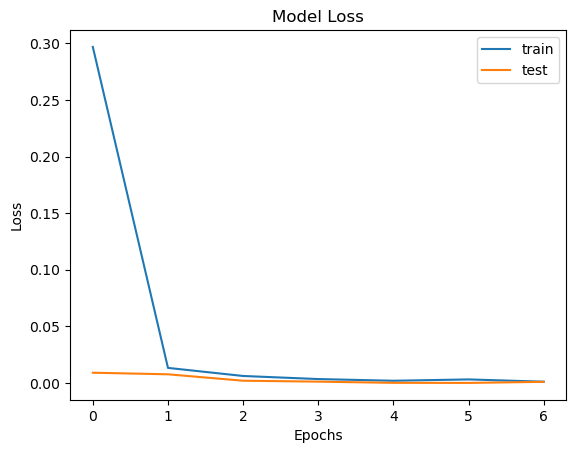

In [26]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

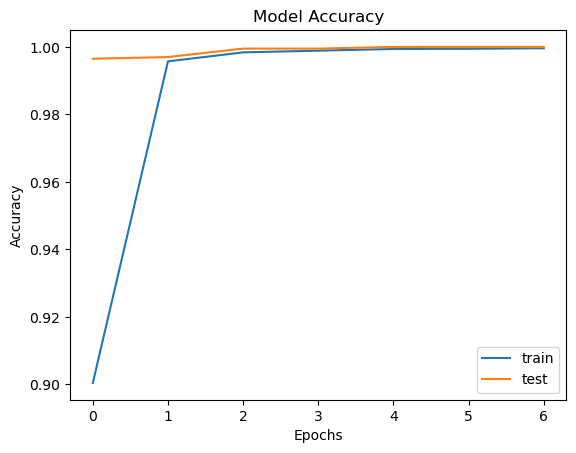

In [27]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# **Calculate loss and accuracy on test data**

In [28]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 9.9024e-04
Test accuracy: 100.00%


## Confusion Matrix

In [31]:
! pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.4 MB/s eta 0:00:002.3 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


[]

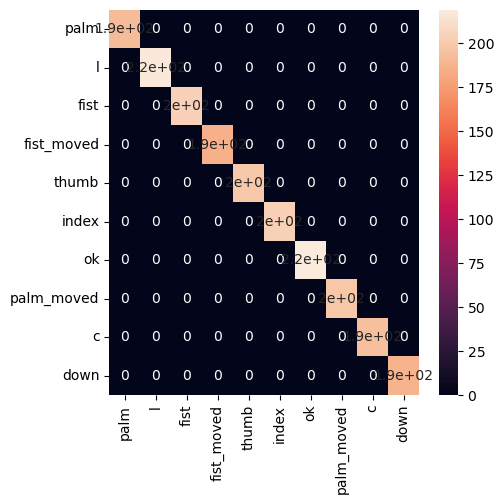

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(5,5))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()

In [33]:
y_pred = model.predict(X_train)

563/563 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step


In [38]:
y_test.shape

(2000, 10)

# **F1 Score**

In [39]:
from sklearn.metrics import f1_score
f=f1_score(y_train.argmax(axis=1),y_pred.argmax(axis=1),average='weighted')
print("F1 Score - ",f)

F1 Score -  0.9997777158286384


# **Precision Score**

In [40]:
from sklearn.metrics import precision_score
p=precision_score(y_train.argmax(axis=1),y_pred.argmax(axis=1),average='weighted')
print("Precision Score - ",p)

Precision Score -  0.9997780236722582


# **Recall Score**

In [41]:
from sklearn.metrics import recall_score
r=recall_score(y_train.argmax(axis=1),y_pred.argmax(axis=1),average='weighted')
print("Recall Score - ",r)

Recall Score -  0.9997777777777778
